# Numerické řešení obyčejných diferenciálních rovnic - Eulerova metoda

### Příklad chládnutí šálku kávy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

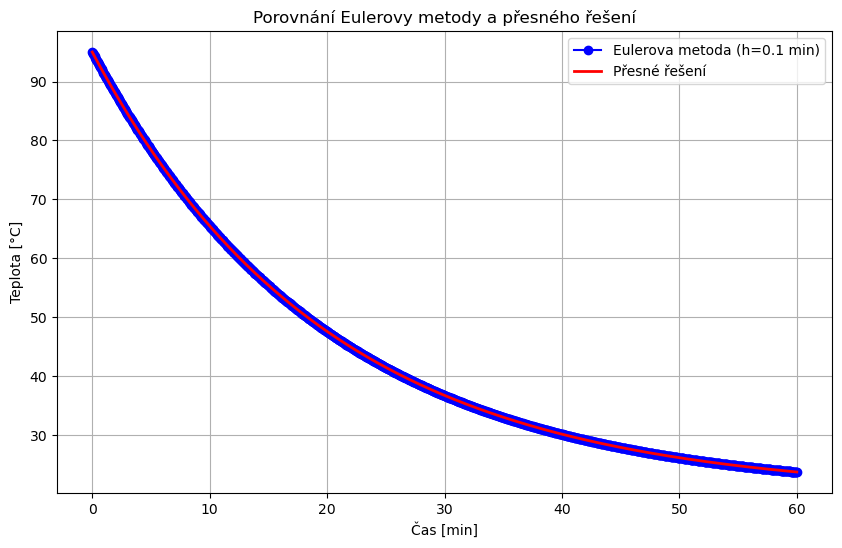

In [3]:
# --- Parametry simulace ---
T_kava_0 = 95.0      # Počáteční teplota kávy [°C]
T_okoli = 20.0       # Teplota okolí [°C]
k = 0.05             # Konstanta chladnutí [1/min]

# --- Časové parametry ---
t_max = 60.0         # Celkový čas simulace [min]
h = 0.05              # ZMĚŇTE SI HODNOTU a sledujte, co se děje!
n_kroku = int(t_max / h)

# ZMĚNA 1: Efektivnější vytvoření časového pole
t = np.linspace(0, t_max, n_kroku + 1)

# --- Příprava pole pro numerické řešení ---
T_euler = np.zeros(n_kroku + 1)
T_euler[0] = T_kava_0 # Nastavení počáteční podmínky

# --- Výpočet eulerovou metodou ---
# Vaše funkce je v pořádku, jen ji musíme zavolat
def euler_method(h, T_input):
    for i in range(n_kroku):
        T_input[i+1] = T_input[i] - h*k*(T_input[i] - T_okoli)
    return T_input

# Zavolání funkce pro výpočet
T_euler = euler_method(h, T_euler)


# ZMĚNA 2: Správný a efektivní výpočet přesného řešení (bez cyklu)
T_presne = T_okoli + (T_kava_0 - T_okoli) * np.exp(-k * t)


# --- Vykreslení grafu pro porovnání ---
plt.figure(figsize=(10, 6))
plt.plot(t, T_euler, 'bo-', label=f'Eulerova metoda (h={h:.1f} min)')
plt.plot(t, T_presne, 'r', linewidth=2, label='Přesné řešení')
plt.title('Porovnání Eulerovy metody a přesného řešení')
plt.xlabel('Čas [min]')
plt.ylabel('Teplota [°C]')
plt.grid(True)
plt.legend()
plt.show()

### Harmonický oscilátor - řešení dvou ODR 1. řádu

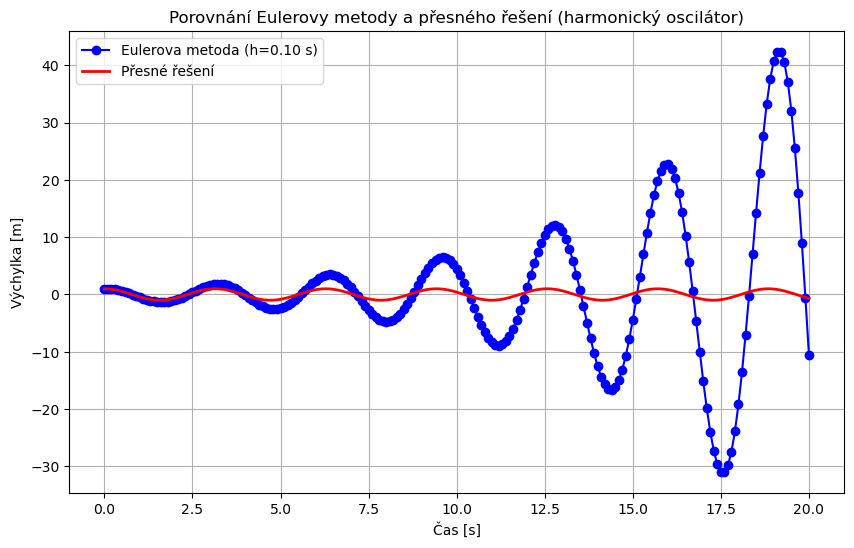

In [4]:
# --- Harmonický oscilátor - řešení dvou ODR 1. řádu ---
m = 1 # hmotnost [kg]
k = 4 # tuhost [N/m]
h = 0.1 # časový krok [s]
t_max = 20 # celkový čas simulace [s]

n_kroku = int(t_max / h)
t = np.linspace(0, t_max, n_kroku + 1)  

vychylka = np.zeros(n_kroku + 1)
rychlost = np.zeros(n_kroku + 1)

vychylka[0] = 1 # počáteční výchylka [m]
rychlost[0] = 0 # počáteční rychlost [m/s]

def euler_HO(h):
    for i in range(n_kroku):
        rychlost[i+1] = rychlost[i] - h*(k/m*vychylka[i])
        vychylka[i+1] = vychylka[i] + h*rychlost[i]
    return vychylka

vychylka = euler_HO(h)

# Přesné řešení harmonického oscilátoru
omega = np.sqrt(k/m)
vychylka_presne = vychylka[0]*np.cos(omega*t) + (rychlost[0]/omega)*np.sin(omega*t)

plt.figure(figsize=(10, 6))
plt.plot(t, vychylka, 'bo-', label=f'Eulerova metoda (h={h:.2f} s)')
plt.plot(t, vychylka_presne, 'r', linewidth=2, label='Přesné řešení')
plt.title('Porovnání Eulerovy metody a přesného řešení (harmonický oscilátor)')
plt.xlabel('Čas [s]')
plt.ylabel('Výchylka [m]')
plt.grid(True)
plt.legend()
plt.show()

### Semi-implicitní Eulerova metoda - používáme rychlost právě spočítanou ne předchozí

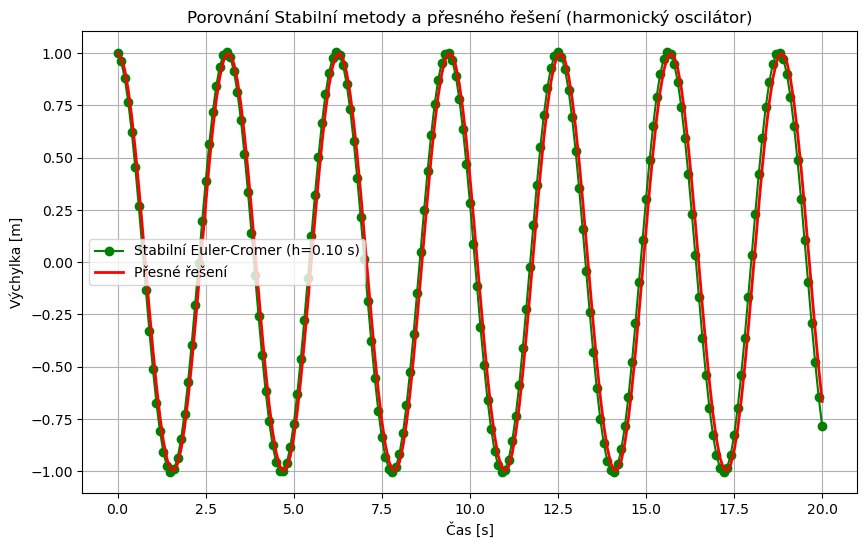

In [5]:
vychylka_stabilni = np.zeros(n_kroku + 1)
rychlost_stabilni = np.zeros(n_kroku + 1)

# Nastavení počátečních podmínek
vychylka_stabilni[0] = 1 # počáteční výchylka [m]
rychlost_stabilni[0] = 0 # počáteční rychlost [m/s]

def euler_cromer_HO(h):
    """
    Řeší soustavu ODR pro harmonický oscilátor pomocí stabilní
    semi-implicitní Eulerovy (Euler-Cromerovy) metody.
    """
    for i in range(n_kroku):
        rychlost_stabilni[i+1] = rychlost_stabilni[i] - h * (k/m * vychylka_stabilni[i])
        
        # 2. KLÍČOVÁ ZMĚNA: Pro výpočet nové polohy použijeme již dříve spočítanou NOVOU rychlost rychlost_stabilni[i+1].
        vychylka_stabilni[i+1] = vychylka_stabilni[i] + h * rychlost_stabilni[i+1]
        
    return vychylka_stabilni

vychylka_vysledek = euler_cromer_HO(h)

# --- Přesné řešení ---
omega = np.sqrt(k/m)
vychylka_presne = vychylka_stabilni[0] * np.cos(omega * t) + (rychlost_stabilni[0] / omega) * np.sin(omega * t)

# --- Vykreslení grafu ---
plt.figure(figsize=(10, 6))
# Změnil jsem barvu na zelenou ('g') pro odlišení od předchozího grafu
plt.plot(t, vychylka_vysledek, 'go-', label=f'Stabilní Euler-Cromer (h={h:.2f} s)')
plt.plot(t, vychylka_presne, 'r', linewidth=2, label='Přesné řešení')
plt.title('Porovnání Stabilní metody a přesného řešení (harmonický oscilátor)')
plt.xlabel('Čas [s]')
plt.ylabel('Výchylka [m]')
plt.grid(True)
plt.legend()
plt.show()

# Metoda Runge-Kutta 4. řádu a HO

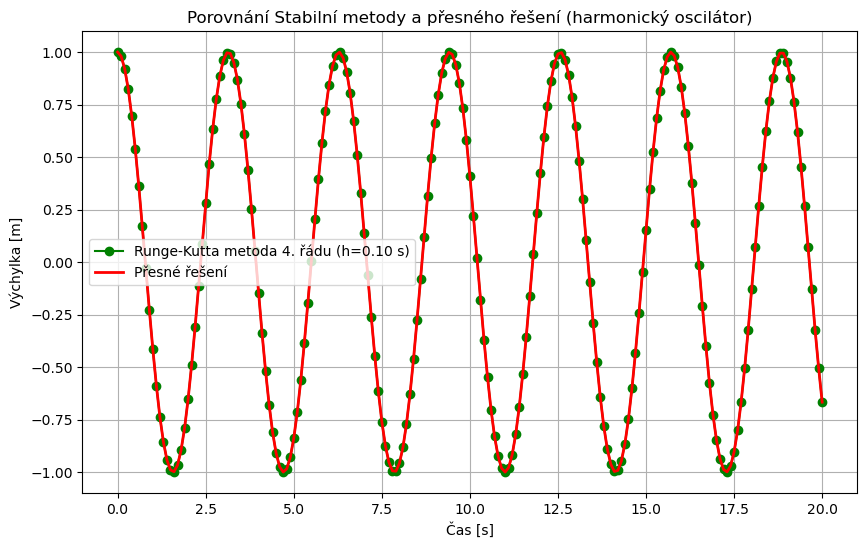

In [6]:
vychylka_runge = np.zeros(n_kroku + 1)
rychlost_runge = np.zeros(n_kroku + 1)

# Nastavení počátečních podmínek
vychylka_runge[0] = 1 # počáteční výchylka [m]
rychlost_runge[0] = 0 # počáteční rychlost [m/s]

c = -k/m # zavedení konstanty pro přehlednost

def runge_kutta_HO(h):
    for i in range (n_kroku):
        k1_x = h * rychlost_runge[i]
        k1_v = h * (c * vychylka_runge[i])

        k2_x = h * (rychlost_runge[i] + k1_v / 2)
        k2_v = h * (c * (vychylka_runge[i] + k1_x / 2))

        k3_x = h * (rychlost_runge[i] + k2_v / 2)
        k3_v = h * (c * (vychylka_runge[i] + k2_x / 2))

        k4_x = h * (rychlost_runge[i] + k3_v)
        k4_v = h * (c * (vychylka_runge[i] + k3_x))

        vychylka_runge[i+1] = vychylka_runge[i] + (k1_x + 2*k2_x + 2*k3_x + k4_x) / 6
        rychlost_runge[i+1] = rychlost_runge[i] + (k1_v + 2*k2_v + 2*k3_v + k4_v) / 6

    return vychylka_runge

h = 0.1 # Zvolíme krok

vychylka_vysledek_runge = runge_kutta_HO(h)

# --- Přesné řešení ---
omega = np.sqrt(k/m)
vychylka_presne = vychylka_stabilni[0] * np.cos(omega * t) + (rychlost_stabilni[0] / omega) * np.sin(omega * t)

# --- Vykreslení grafu ---
plt.figure(figsize=(10, 6))
# Změnil jsem barvu na zelenou ('g') pro odlišení od předchozího grafu
plt.plot(t, vychylka_vysledek_runge, 'go-', label=f'Runge-Kutta metoda 4. řádu (h={h:.2f} s)')
plt.plot(t, vychylka_presne, 'r', linewidth=2, label='Přesné řešení')
plt.title('Porovnání Stabilní metody a přesného řešení (harmonický oscilátor)')
plt.xlabel('Čas [s]')
plt.ylabel('Výchylka [m]')
plt.grid(True)
plt.legend()
plt.show()

## Tlumené nucené kmitání HO a RK4

Vlastní frekvence ω = 2.00 rad/s
Frekvence vnější síly Ω = 1.00 rad/s


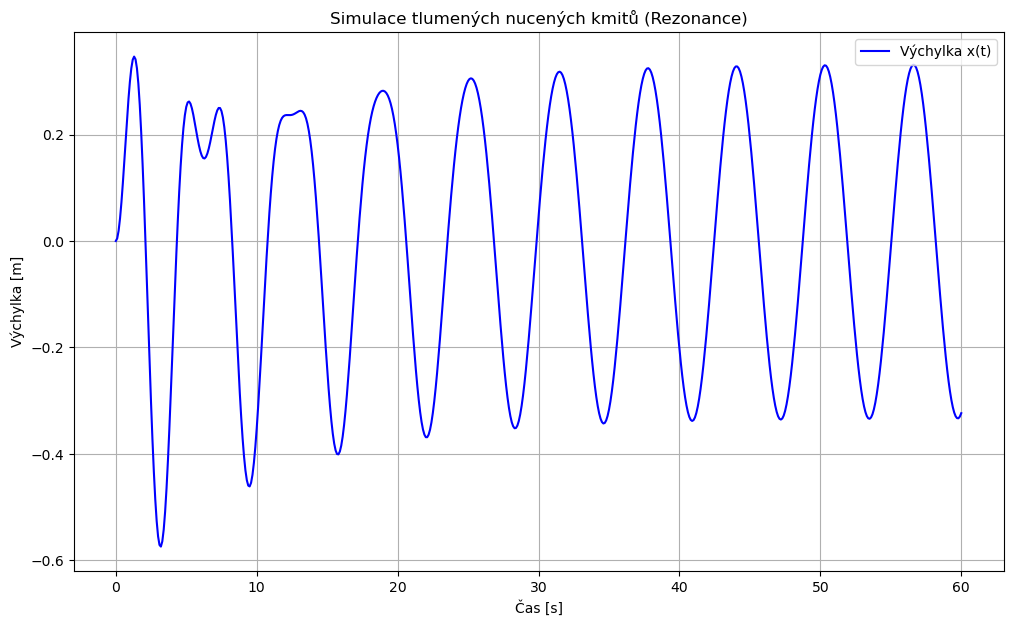

In [9]:
# --- NOVÉ PARAMETRY ---
b = 0.2      # koeficient tlumení [Ns/m] (malé tlumení)
F0 = 1.0     # amplituda vnější síly [N]
Omega = 1.0  # úhlová frekvence vnější síly [rad/s]

# --- Pro srovnání si spočítáme vlastní frekvenci systému ---
omega = np.sqrt(k/m)
print(f"Vlastní frekvence ω = {omega:.2f} rad/s")
print(f"Frekvence vnější síly Ω = {Omega:.2f} rad/s")
if omega == Omega:
    print("Stav: rezonance")

# --- Parametry simulace ---
t_max = 60.0   # celkový čas simulace [s]
h = 0.1        # časový krok [s]
n_kroku = int(t_max / h)
t = np.linspace(0, t_max, n_kroku + 1)

vychylka_tlum = np.zeros(n_kroku + 1)
rychlost_tlum = np.zeros(n_kroku + 1)

# --- Počáteční podmínky (start z klidu v rovnovážné poloze) ---
vychylka_tlum[0] = 0.0
rychlost_tlum[0] = 0.0

# --- Implementace Runge-Kutta 4. řádu ---
for i in range(n_kroku):
    x_i = vychylka_tlum[i]
    v_i = rychlost_tlum[i]
    t_i = t[i]
 
    # 1. odhad (na začátku kroku, v čase t_i)
    k1_x = h * v_i
    k1_v = h * (-(k/m)*x_i - (b/m)*v_i + (F0/m)*np.cos(Omega*t_i))

    # 2. odhad (uprostřed kroku, v čase t_i + h/2)
    k2_x = h * (v_i + 0.5*k1_v)
    k2_v = h * (-(k/m)*(x_i + 0.5*k1_x) - (b/m)*(v_i + 0.5*k1_v) + (F0/m)*np.cos(Omega*(t_i + h/2)))

    # 3. odhad (znovu uprostřed kroku, ale s lepším odhadem)
    k3_x = h * (v_i + 0.5*k2_v)
    k3_v = h * (-(k/m)*(x_i + 0.5*k2_x) - (b/m)*(v_i + 0.5*k2_v) + (F0/m)*np.cos(Omega*(t_i + h/2)))

    # 4. odhad (na konci kroku, v čase t_i + h)
    k4_x = h * (v_i + k3_v)
    k4_v = h * (-(k/m)*(x_i + k3_x) - (b/m)*(v_i + k3_v) + (F0/m)*np.cos(Omega*(t_i + h)))
    
    # Finální krok - vážený průměr
    vychylka_tlum[i+1] = x_i + (1/6)*(k1_x + 2*k2_x + 2*k3_x + k4_x)
    rychlost_tlum[i+1] = v_i + (1/6)*(k1_v + 2*k2_v + 2*k3_v + k4_v)

# --- Vykreslení výsledku ---
plt.figure(figsize=(12, 7))
plt.plot(t, vychylka_tlum, 'b-', label='Výchylka x(t)')
plt.title('Simulace tlumených nucených kmitů (Rezonance)')
plt.xlabel('Čas [s]')
plt.ylabel('Výchylka [m]')
plt.grid(True)
plt.legend()
plt.show()

## Obecné řešení RK 4. řádu pro obecnou funkci

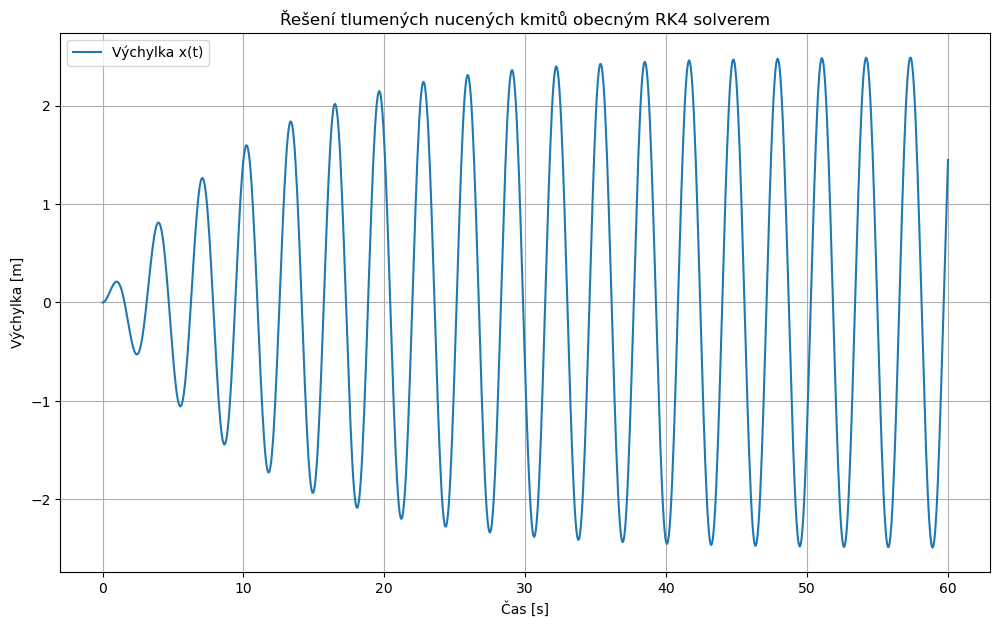

In [8]:
def rk4_solver(model_func, S0, t):
    """
    Řeší soustavu ODR 1. řádu pomocí metody Runge-Kutta 4. řádu.

    Args:
        model_func: Funkce, která definuje ODR (model). Musí brát jako
                    argumenty stavový vektor S a čas t a vracet
                    vektor derivací dS/dt.
        S0: Počáteční stavový vektor [x0, v0, ...].
        t: Pole časových bodů, pro které se má řešení spočítat.

    Returns:
        Pole s historií stavového vektoru v jednotlivých časových bodech.
    """
    S_history = np.zeros((len(t), len(S0)))  # Pole pro uložení všech výsledků
    S_history[0] = S0                       # Nastavení počáteční podmínky
    
    # Průchod všemi časovými kroky
    for i in range(len(t) - 1):
        h = t[i+1] - t[i]  # Velikost aktuálního kroku
        S_i = S_history[i] # Aktuální stavový vektor

        # Výpočty pomocných kroků k1 až k4
        # Důležité: Všechny operace (sčítání, násobení) jsou vektorové díky NumPy!
        k1 = np.asarray(model_func(S_i, t[i]))
        k2 = np.asarray(model_func(S_i + (h/2)*k1, t[i] + h/2))
        k3 = np.asarray(model_func(S_i + (h/2)*k2, t[i] + h/2))
        k4 = np.asarray(model_func(S_i + h*k3, t[i] + h))

        # Výpočet nového stavového vektoru pomocí váženého průměru
        S_next = S_i + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        S_history[i+1] = S_next
        
    return S_history

# ===================================================================
# Část 2: DEFINICE KONKRÉTNÍHO FYZIKÁLNÍHO PROBLÉMU
# Zde definujeme, CO chceme řešit. Toto je jediná část,
# kterou měníte pro nový problém.
# ===================================================================

def model_tlumenych_kmitu(S, t):
    """
    Definuje model tlumeného nuceného oscilátoru.

    Args:
        S: Aktuální stavový vektor [x, v].
        t: Aktuální čas.

    Returns:
        Vektor derivací dS/dt = [dx/dt, dv/dt].
    """
    x, v = S[0], S[1]  # Rozbalení stavového vektoru pro přehlednost
    
    # Parametry našeho konkrétního oscilátoru
    m = 1.0
    k = 4.0
    b = 0.2
    F0 = 1.0
    Omega = 2.0
    
    # Naše dvě rovnice
    dxdt = v
    dvdt = -(k/m)*x - (b/m)*v + (F0/m)*np.cos(Omega*t)
    
    return [dxdt, dvdt]

# ===================================================================
# Část 3: SPUŠTĚNÍ SIMULACE A VIZUALIZACE
# Zde náš obecný solver použijeme na náš konkrétní problém.
# ===================================================================

# --- Parametry simulace ---
t_start = 0.0
t_end = 60.0
num_points = 1000  # Počet bodů v čase
t_points = np.linspace(t_start, t_end, num_points)

# --- Počáteční podmínky ---
x0 = 0.0  # Počáteční výchylka
v0 = 0.0  # Počáteční rychlost
S0 = [x0, v0] # Počáteční stavový vektor

# --- Zavolání solveru ---
# Předáváme mu NÁZEV FUNKCE našeho modelu, počáteční stav a časy
solution_history = rk4_solver(model_tlumenych_kmitu, S0, t_points)

# --- Zpracování a vizualizace výsledků ---
# Výsledky jsou v jednom poli, musíme si je "rozřezat" na jednotlivé proměnné
vychylka_history = solution_history[:, 0]  # Všechny řádky, sloupec 0
rychlost_history = solution_history[:, 1]  # Všechny řádky, sloupec 1

plt.figure(figsize=(12, 7))
plt.plot(t_points, vychylka_history, label='Výchylka x(t)')
plt.title('Řešení tlumených nucených kmitů obecným RK4 solverem')
plt.xlabel('Čas [s]')
plt.ylabel('Výchylka [m]')
plt.grid(True)
plt.legend()
plt.show()